In [35]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from mpl_toolkits.mplot3d import Axes3D


df_fruits = pd.read_table('Dfs/fruit_data_with_colors.txt')

In [15]:
df_fruits.sample(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
57,4,lemon,unknown,152,6.5,8.5,0.72
41,3,orange,turkey_navel,180,7.6,8.2,0.79
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
54,4,lemon,unknown,116,6.1,8.5,0.71
5,2,mandarin,mandarin,80,5.8,4.3,0.77


Criação de uma correspondência entre o valor do rótulo e o nome da fruta para tornar os resultados mais fáceis de interpretar.

In [16]:
fruit_name = dict(zip(df_fruits['fruit_label'].unique(), df_fruits['fruit_name'].unique()))
fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

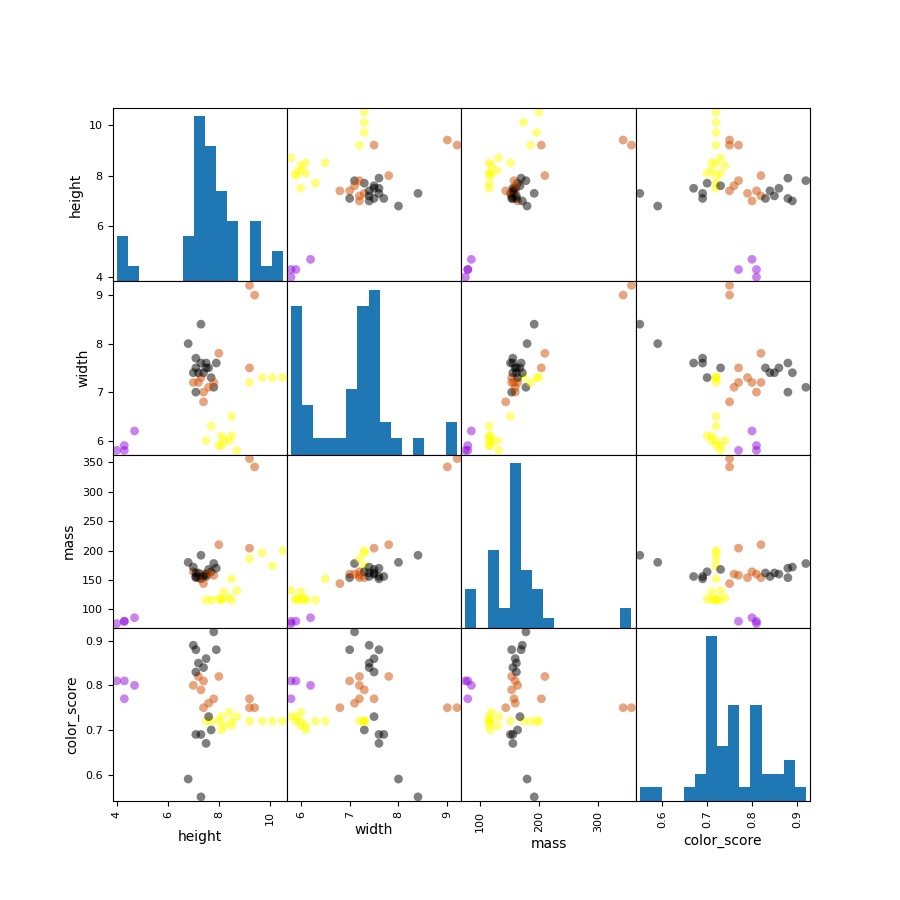

In [17]:
X = df_fruits[['height', 'width', 'mass', 'color_score']]
y = df_fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = plt.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

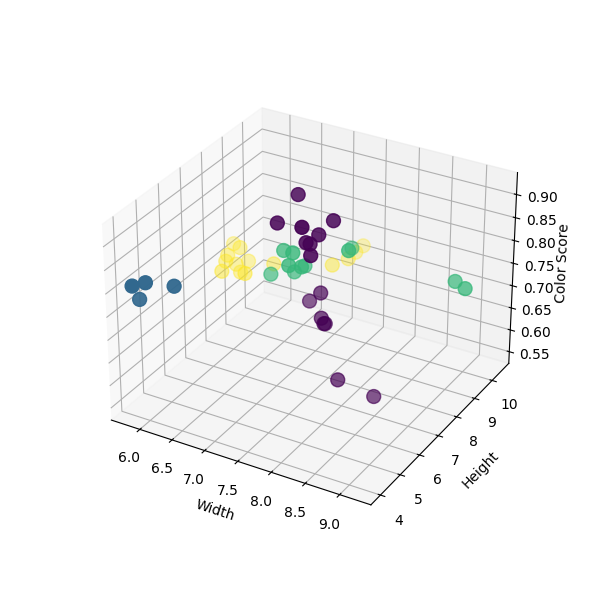

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker='o', s=100)
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Color Score', labelpad=1)
plt.show()

# Criar um Objeto Classificador

In [19]:
X = df_fruits[['mass', 'width', 'height']]
y = df_fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
scr = knn.score(X_test, y_test)
print(f'O algoritmo obteve {scr:.3f} pontos.')

O algoritmo obteve 0.533 pontos.


In [21]:
# Primeiro exemplo: Uma pequena fruta com massa: 20g, comprimento: 4.3cm, altura: 5.5cm
fruit_pred = knn.predict([[20, 4.3, 5.5]])
fruit_name[fruit_pred[0]]

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [22]:
# Segundo exemplo: Uma grande e longa fruta com massa: 100g, comprimento: 6.3cm, altura: 8.5cm
fruit_pred = knn.predict([[100, 6.3, 8.5]])
fruit_name[fruit_pred[0]]

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipympl\backend_nbagg.py:335: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


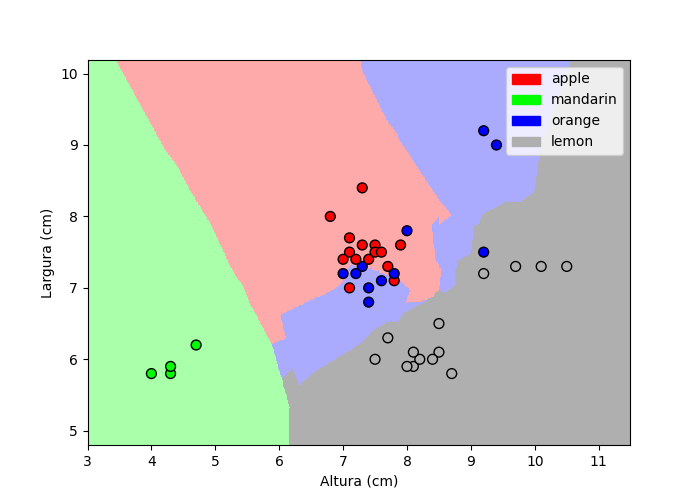

In [42]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    # Converte os DataFrames do pandas para arrays do NumPy para o modelo
    X_mat = X[['height', 'width']].values
    y_mat = y.values
    
    # Cria os mapas de cores
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#AFAFAF'])
    
    # Cria e treina o classificador k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    
    # Define o tamanho do passo da grade (mesh) e o tamanho dos pontos
    mesh_step_size = .01
    plot_symbol_size = 50
    
    # Define os limites do gráfico e cria a grade de pontos
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    
    # Faz a predição para cada ponto da grade para desenhar a fronteira de decisão
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Cria a figura e desenha as regiões de decisão coloridas
    plt.figure(figsize=(7, 5))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    
    # Plota os pontos de treinamento por cima das regiões
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cmap_bold, edgecolor='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Cria a legenda do gráfico
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    
 
    # Define os rótulos dos eixos e o título
    plt.xlabel('Altura (cm)')
    plt.ylabel('Largura (cm)')
    # plt.title(f"Classificação de 4 classes (k = {n_neighbors}, weights = '{weights}')")
    
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')